In [86]:
# Import necessary libraries
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/rupak-1/ML-project/main/Mother%20Jones%20-%20Mass%20Shootings%20Database%2C%201982%20-%202019.csv"
df = pd.read_csv(url)


In [65]:
# Select relevant features for clustering
features = ['fatalities', 'injured', 'total_victims', 'age_of_shooter', 'latitude', 'longitude']

# Extract selected features
X = df[features]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-66-0ccd9f93d845>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.labels_


                                      case                location      date  \
23             Oxford High School shooting        Oxford, Michigan  11/30/21   
24                   San Jose VTA shooting    San Jose, California   5/26/21   
25                FedEx warehouse shooting   Indianapolis, Indiana   4/15/21   
26          Orange office complex shooting      Orange, California   3/31/21   
27            Boulder supermarket shooting       Boulder, Colorado   3/22/21   
..                                     ...                     ...       ...   
143        Shopping centers spree killings       Palm Bay, Florida   4/23/87   
144  United States Postal Service shooting        Edmond, Oklahoma   8/20/86   
145         San Ysidro McDonald's massacre  San Ysidro, California   7/18/84   
146              Dallas nightclub shooting           Dallas, Texas   6/29/84   
147                  Welding shop shooting          Miami, Florida   8/20/82   

                                       

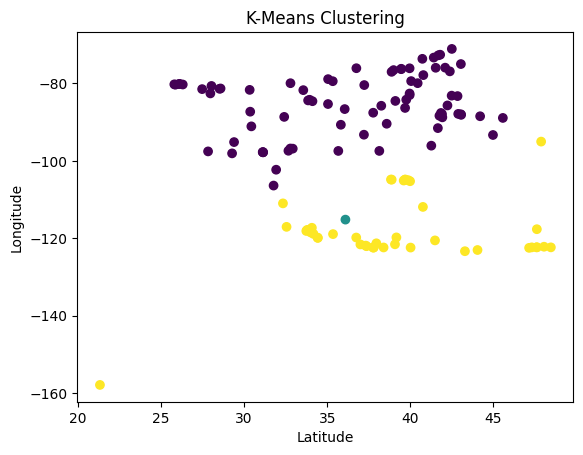

In [66]:
# Import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Handle missing values and convert non-numeric values to numeric
df[features] = df[features].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df = df.dropna(subset=features)

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(df[features])

# Choose the number of clusters (you may need to tune this based on your data)
num_clusters = 3

# Initialize KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the standardized data
kmeans.fit(X_standardized)

# Add cluster labels to the original DataFrame
df['cluster'] = kmeans.labels_

# Print the DataFrame with cluster labels
print(df)

# Visualize the clusters (for 2D data)
plt.scatter(df['latitude'], df['longitude'], c=df['cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()


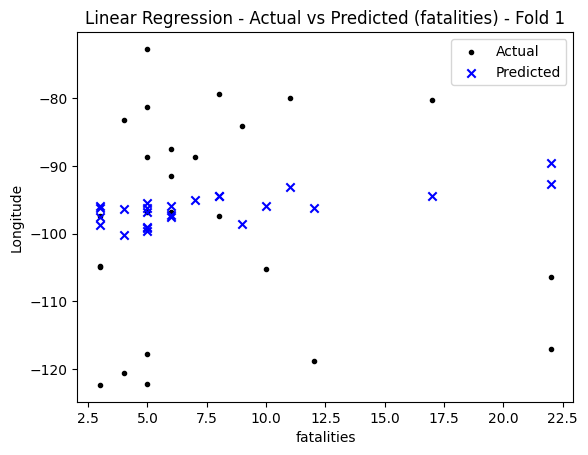

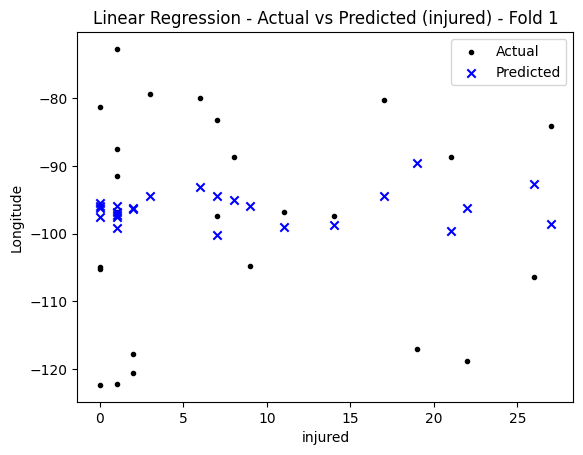

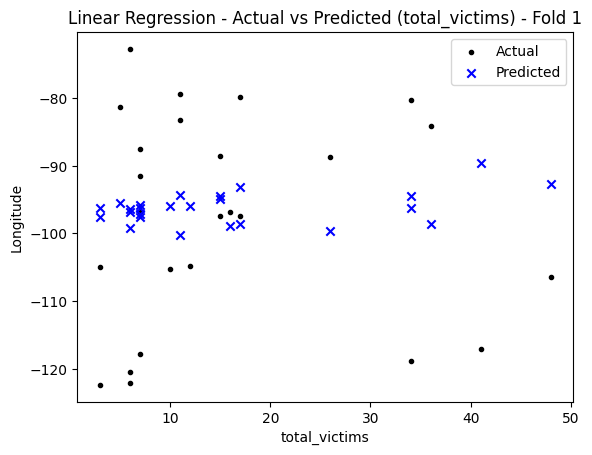

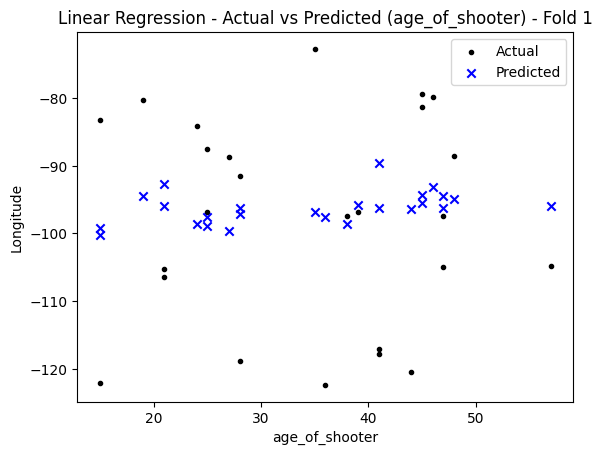

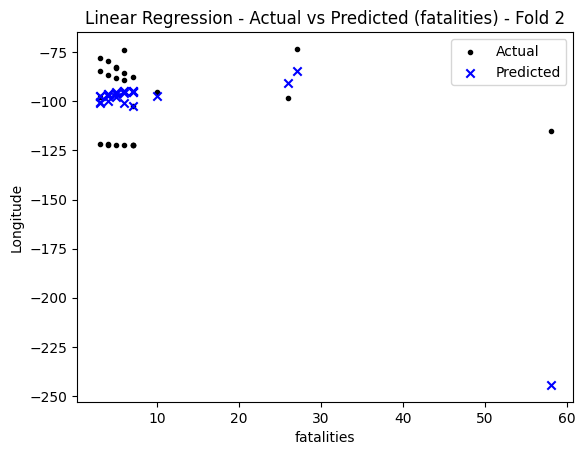

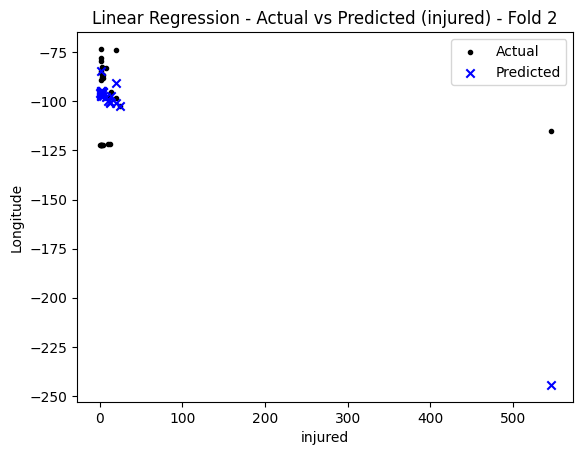

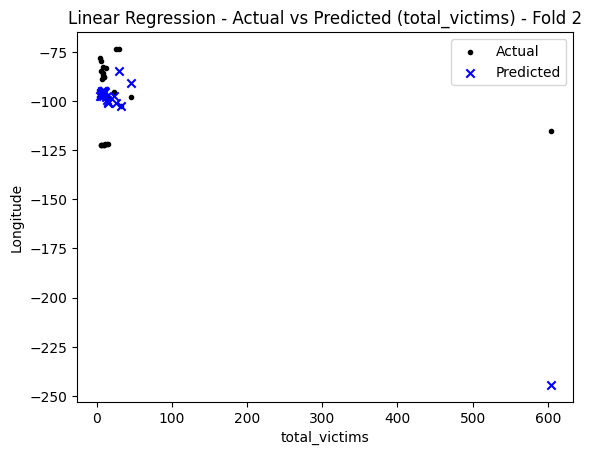

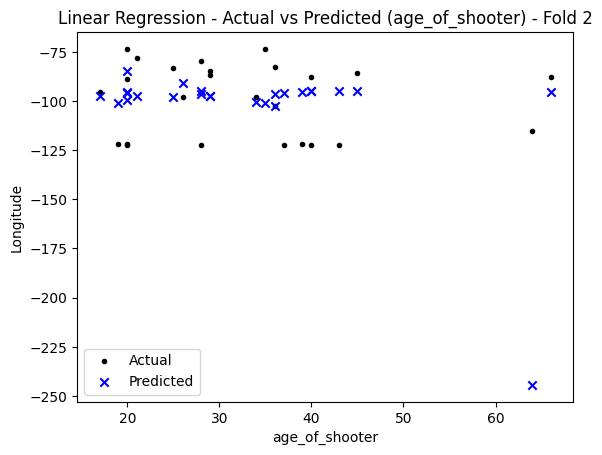

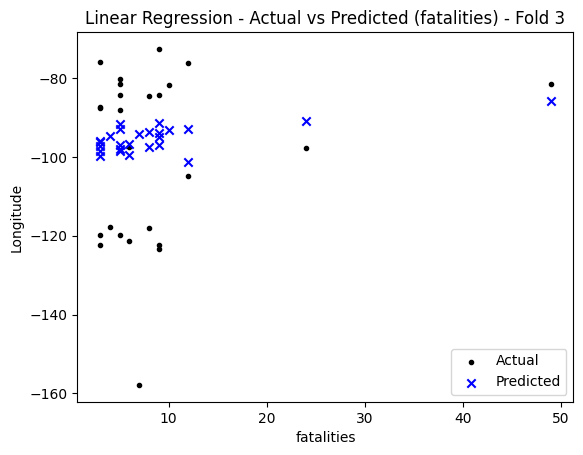

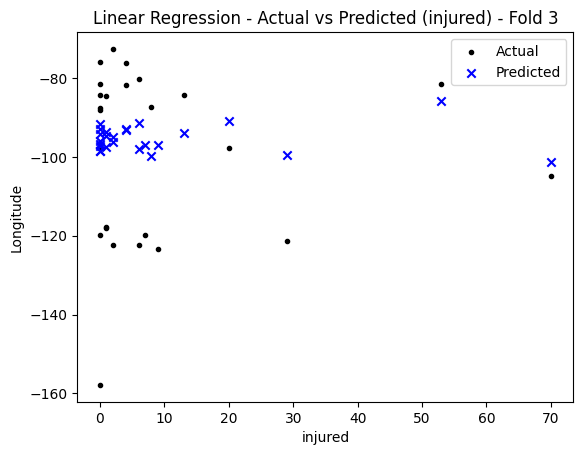

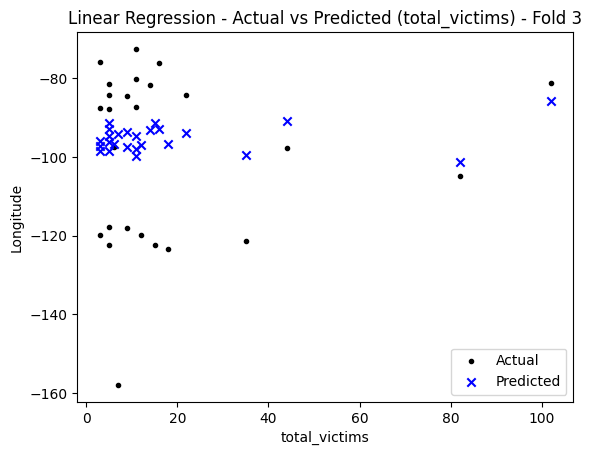

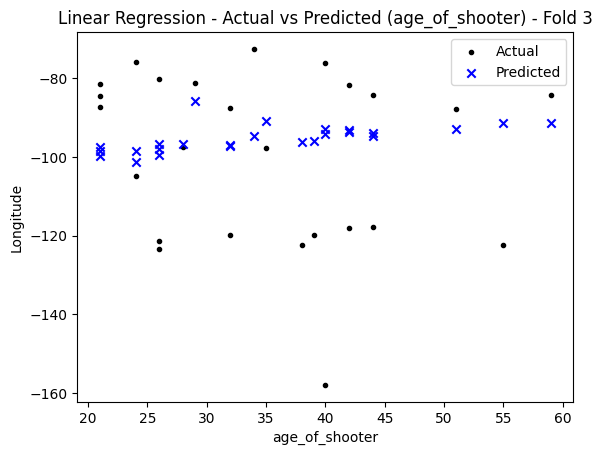

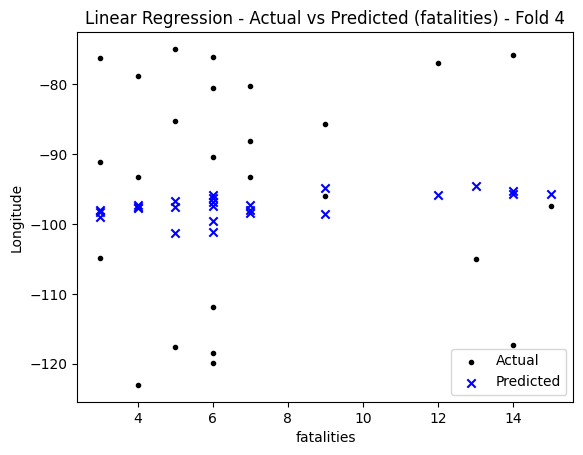

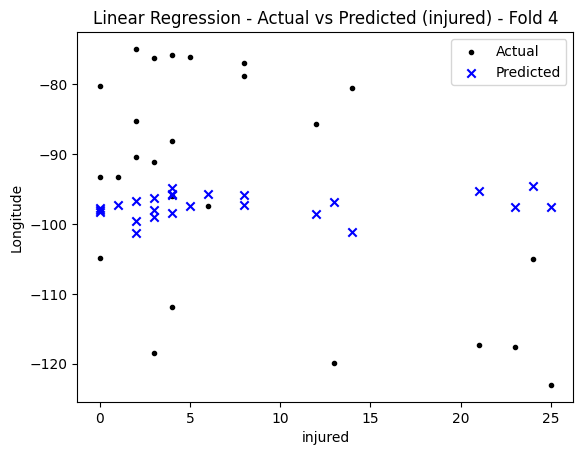

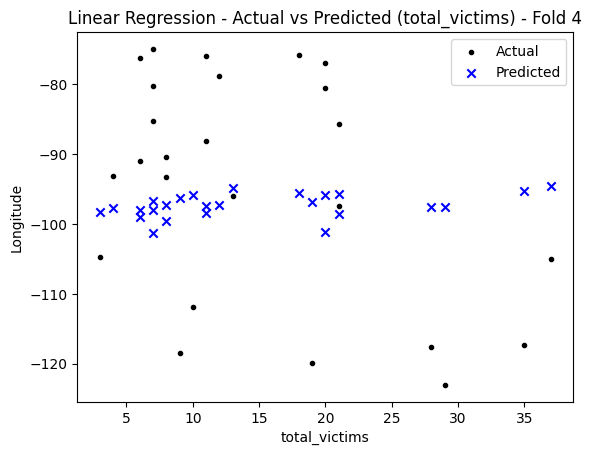

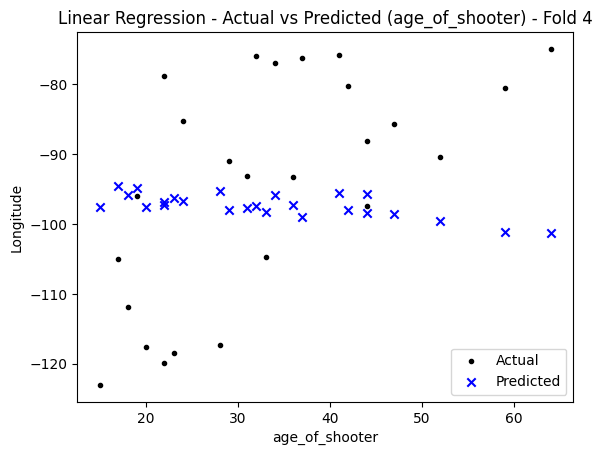

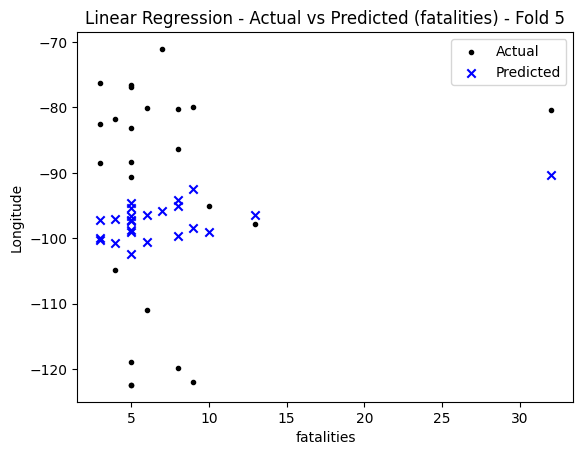

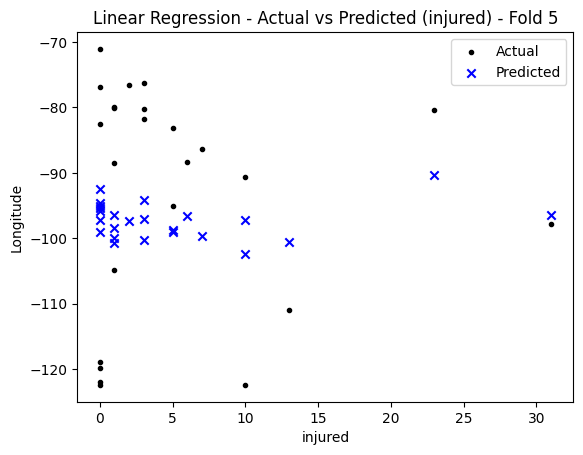

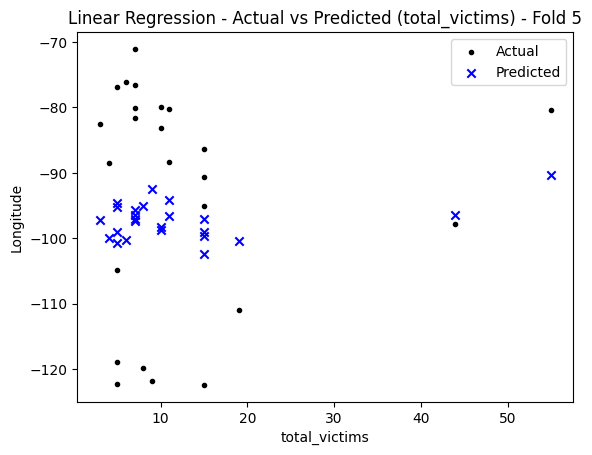

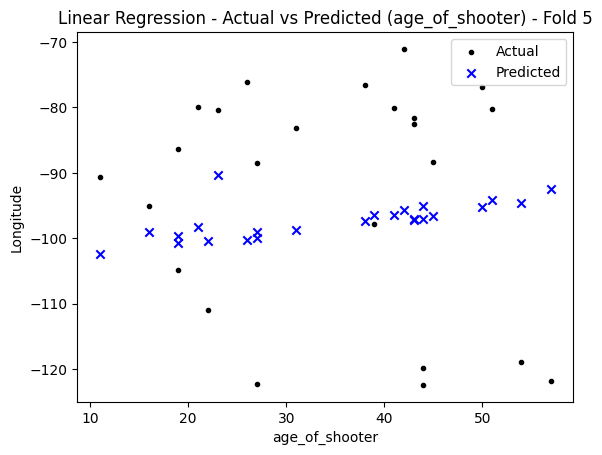

Mean Squared Error across 5 folds: 457.2680382131472


In [88]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming df, features, and target are already defined from the previous cell

# Define the target variable
target = 'longitude'  # Adjust the target variable based on your needs

# Handle missing values and convert non-numeric values to numeric
df[features] = df[features].apply(pd.to_numeric, errors='coerce')
df[target] = pd.to_numeric(df[target], errors='coerce')

# Drop rows with missing values
df = df.dropna(subset=features + [target])

# Initialize Linear Regression model
model = LinearRegression()

# Define the number of folds for k-fold cross-validation
num_folds = 5  # You can adjust this number based on your preference

# Perform k-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store MSE for each fold
mse_scores = []

for train_index, test_index in kf.split(df):
    X_train, X_test = df.iloc[train_index][features], df.iloc[test_index][features]
    y_train, y_test = df.iloc[train_index][target], df.iloc[test_index][target]

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model for this fold
    mse_fold = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse_fold)

    # Visualize the predictions for each feature
    for feature in features:
        plt.scatter(X_test[feature], y_test, color='black', marker='.', label='Actual')
        plt.scatter(X_test[feature], y_pred, color='blue', marker='x', label='Predicted')
        plt.xlabel(feature)
        plt.ylabel('Longitude')
        plt.legend()
        plt.title(f'Linear Regression - Actual vs Predicted ({feature}) - Fold {len(mse_scores)}')
        plt.show()

# Display the mean MSE across all folds
mean_mse = sum(mse_scores) / len(mse_scores)
print(f'Mean Squared Error across {num_folds} folds: {mean_mse}')


In [87]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor  # Replace with the appropriate regression model

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Replace RandomForestRegressor with your chosen regression model

# Create a regression model (replace with your chosen model)
model = RandomForestRegressor()

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Replace 'n_splits' with the desired number of folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_results = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Display the results
print("Cross-Validation Results (Negative Mean Squared Error):")
print(cv_results)

# Calculate and display the mean and standard deviation of the cross-validation results
print(f"Mean RMSE: {abs(cv_results.mean())}")
print(f"Standard Deviation RMSE: {cv_results.std()}")


Cross-Validation Results (Negative Mean Squared Error):
[nan nan nan nan nan]
Mean RMSE: nan
Standard Deviation RMSE: nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 981, in predict
    X = self._validate_X_predict(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 602, in _validate_X_predict
    X = self._validate_data(X, dtype=DTYPE, 

<ipython-input-85-9ede97c92378>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(github_url, error_bad_lines=False)
<ipython-input-85-9ede97c92378>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[selected_columns].corr()


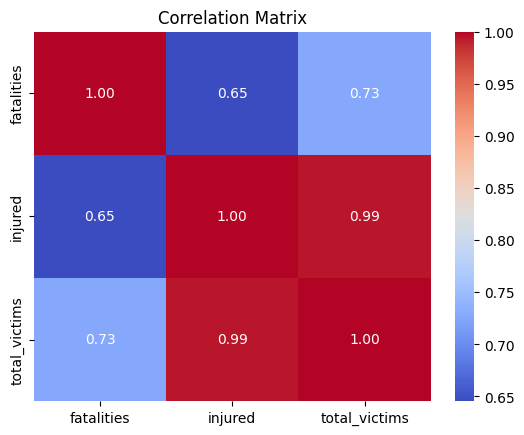

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# GitHub raw URL for the CSV file
github_url = 'https://raw.githubusercontent.com/rupak-1/ML-project/main/Mother%20Jones%20-%20Mass%20Shootings%20Database%2C%201982%20-%202019.csv'

# Load the dataset with additional parameters to handle format issues
df = pd.read_csv(github_url, error_bad_lines=False)

# Select relevant columns for correlation analysis
selected_columns = ['fatalities', 'injured', 'total_victims', 'age_of_shooter']

# Calculate correlation matrix
correlation_matrix = df[selected_columns].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
